IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

FUNCTIONS

In [2]:
def load_and_prepare_data(filepath):
    apples_df = pd.read_csv(filepath)

    apples_df = pd.get_dummies(apples_df)
    return apples_df

def standardize_data(df):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df.values)
    return X_scaled

def plot_elbow(X, max_clusters=20):
    inertia = []
    K = range(1, max_clusters + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

def apply_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    return kmeans, labels

def plot_clusters(X, labels, kmeans):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('K-means Clustering Visualization')
    plt.colorbar(label='Cluster')
    plt.show()

def display_cluster_info(df, kmeans, labels):
    centroids = kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns=df.columns[:-1])  # Exclude the 'Cluster' column
    cluster_summary = df.groupby('Cluster').mean()
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f'The silhouette score for the clustering is: {silhouette_avg:.4f}')
    return centroids_df, cluster_summary, silhouette_avg


def plot_silhouette(X, labels, n_clusters):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    sample_silhouette_values = silhouette_samples(X, labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
    
    plt.show()

PREPROCESS DATA

In [3]:
# Load and prepare data
apples_df = load_and_prepare_data('datasets/apple_quality.csv')

# Standardize the data
X_scaled = standardize_data(apples_df)

ELBOW PLOT (check optimal number of K)

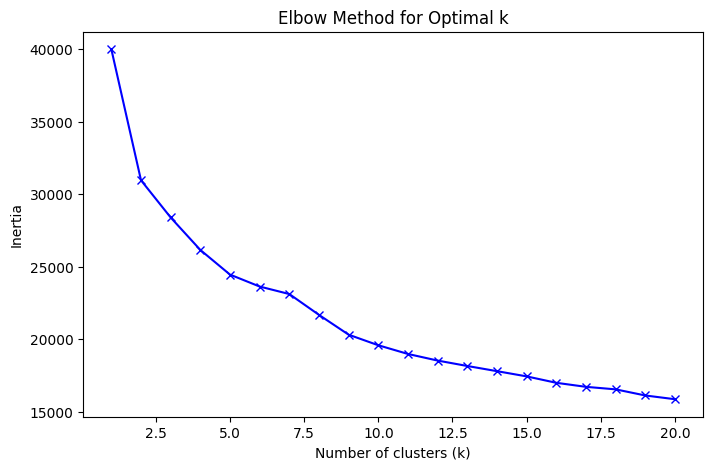

In [4]:
# Plot the elbow graph to find the optimal number of clusters
plot_elbow(X_scaled)

APPLYING K MEANS 

In [5]:
k_optimal=2
    
# Apply K-means clustering
kmeans, labels = apply_kmeans(X_scaled, k_optimal)
apples_df['Cluster'] = labels

RESULTS

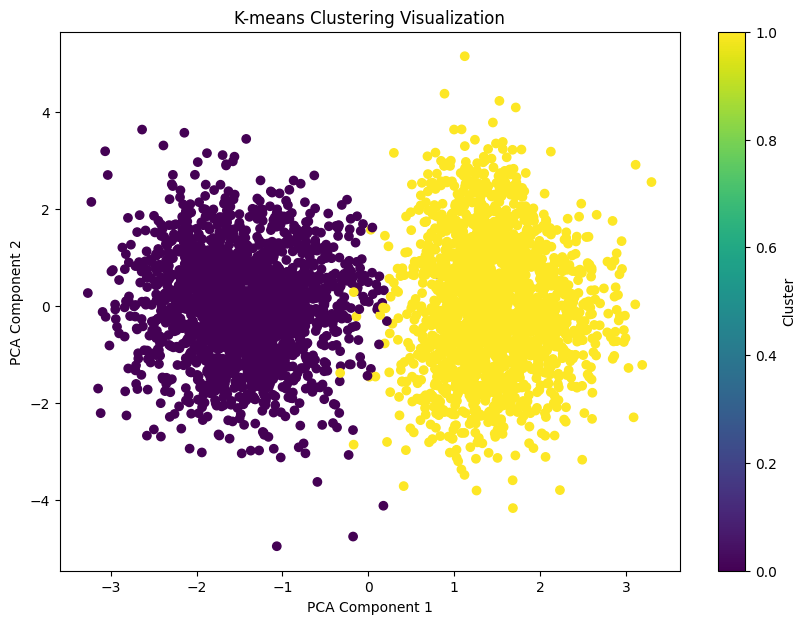

The silhouette score for the clustering is: 0.2286
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity  Quality_bad  Quality_good  Cluster  
0 -0.491590        False          True        1  
1 -0.722809        False          True        1  
2  2.621636         True         False        0  
3  0.790723        False          True        1  
4  0.501984        False          True        1  


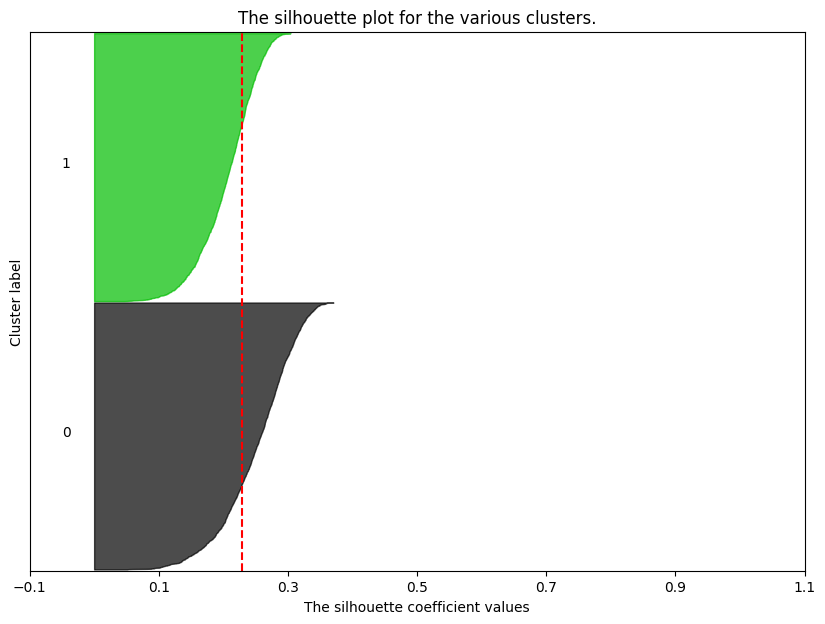

                A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
Cluster                                                                       
0        1993.859218 -0.974358 -0.991828  -0.959195     1.002871   0.008871   
1        2005.118263 -0.033553 -0.987274   0.016287     0.968154   1.013356   

         Ripeness   Acidity  Quality_bad  Quality_good  
Cluster                                                 
0        0.994646  0.093151          1.0           0.0  
1        0.003890  0.060668          0.0           1.0  


In [6]:
# Plot the clusters
plot_clusters(X_scaled, labels, kmeans)

# Display cluster info
centroids_df, cluster_summary, silhouette_avg = display_cluster_info(apples_df, kmeans, labels)

# Show the first few rows of the dataframe with the cluster labels
print(apples_df.head())

# Plot silhouette analysis
plot_silhouette(X_scaled, labels, k_optimal)

# Group the original data by the cluster labels and calculate mean values for each cluster
cluster_summary = apples_df.groupby('Cluster').mean()
print(cluster_summary)

In [7]:
cluster_summary

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_bad,Quality_good
Cluster,,,,,,,,,,
0,1993.859218,-0.974358,-0.991828,-0.959195,1.002871,0.008871,0.994646,0.093151,1.0,0.0
1,2005.118263,-0.033553,-0.987274,0.016287,0.968154,1.013356,0.003890,0.060668,0.0,1.0
